In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu124


In [ ]:
!nvidia-smi

Wed Aug 28 05:18:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 27.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 769, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'predict', 'train', 'export', 'track', 'val', 'benchmark'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'obb', 'segment', 'detect', 'pose'}
                MODE (required) is one of {'predict', 'train', 'export', 'track', 'val', 'benchmark'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="oQApBqGjIB8iPswxJSoQ")
project = rf.workspace("tsbi").project("treeimage")
version = project.version(2)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=YOLOv9e.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 805, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 143, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 295, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 857, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 784, in torch_safe_load
    ckpt = torch.load(fi

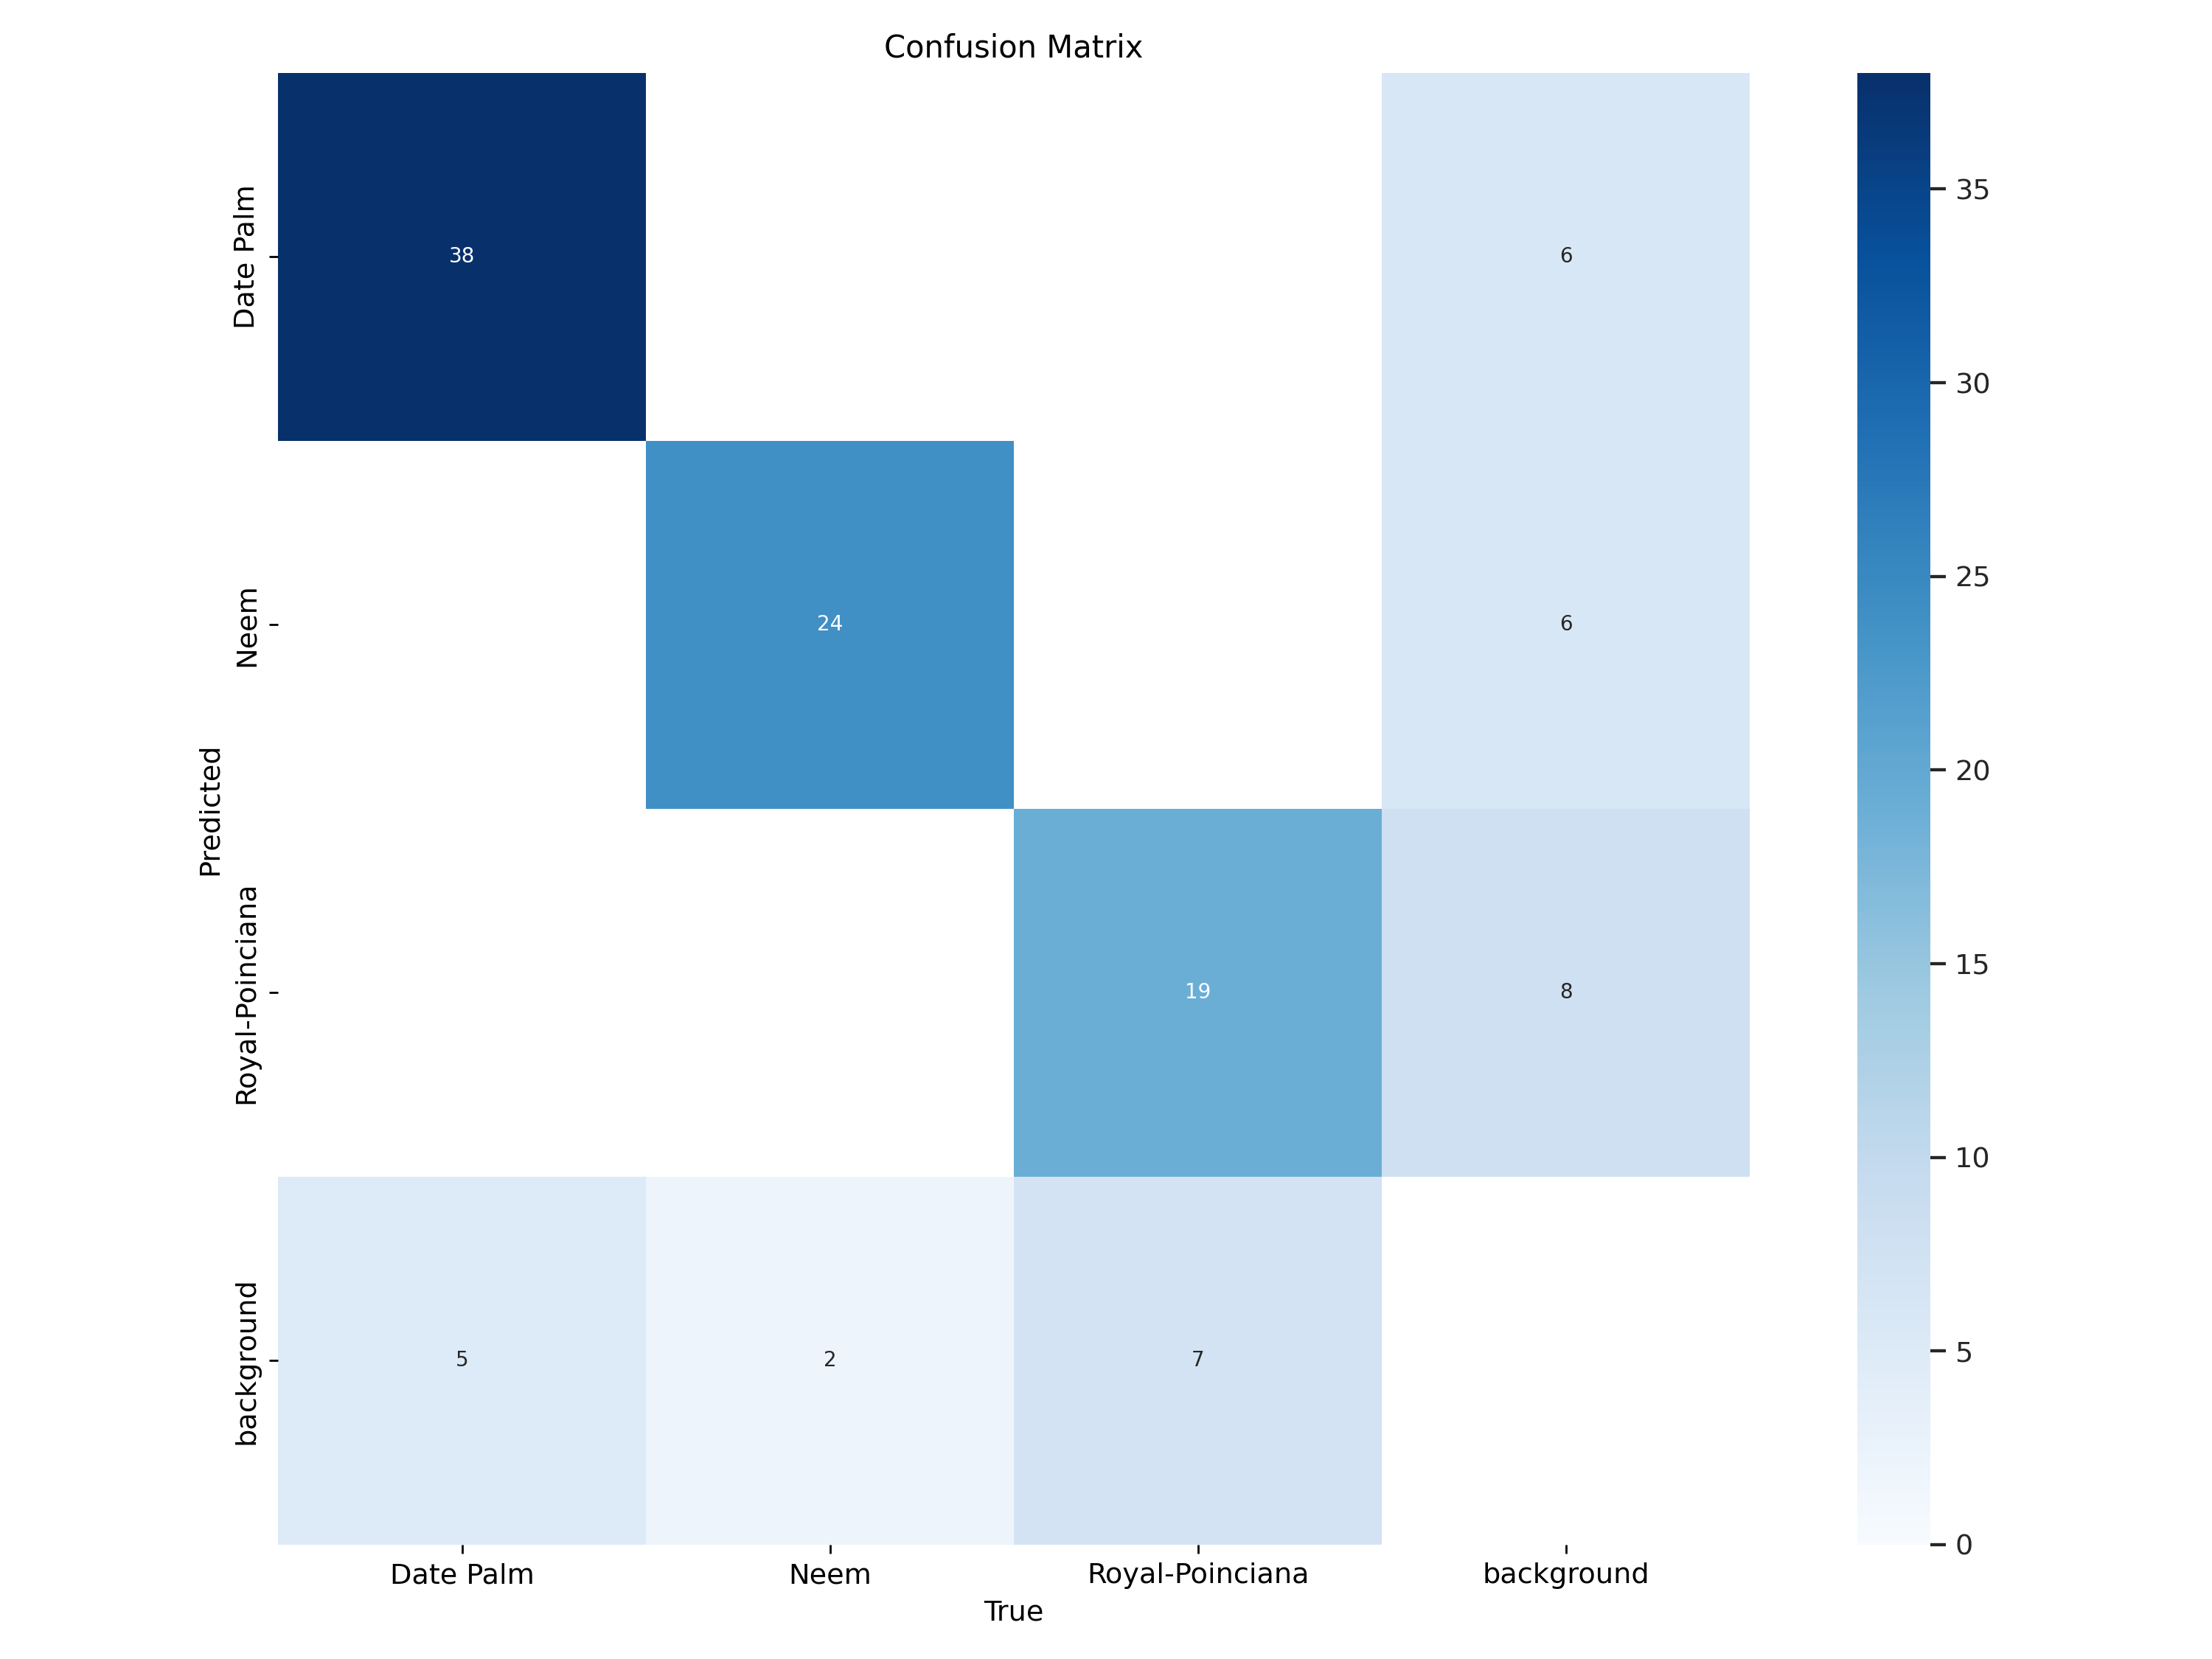

In [ ]:
from IPython.display import display, Image
Image(filename=f'/content/runs/detect/train4/confusion_matrix.png')

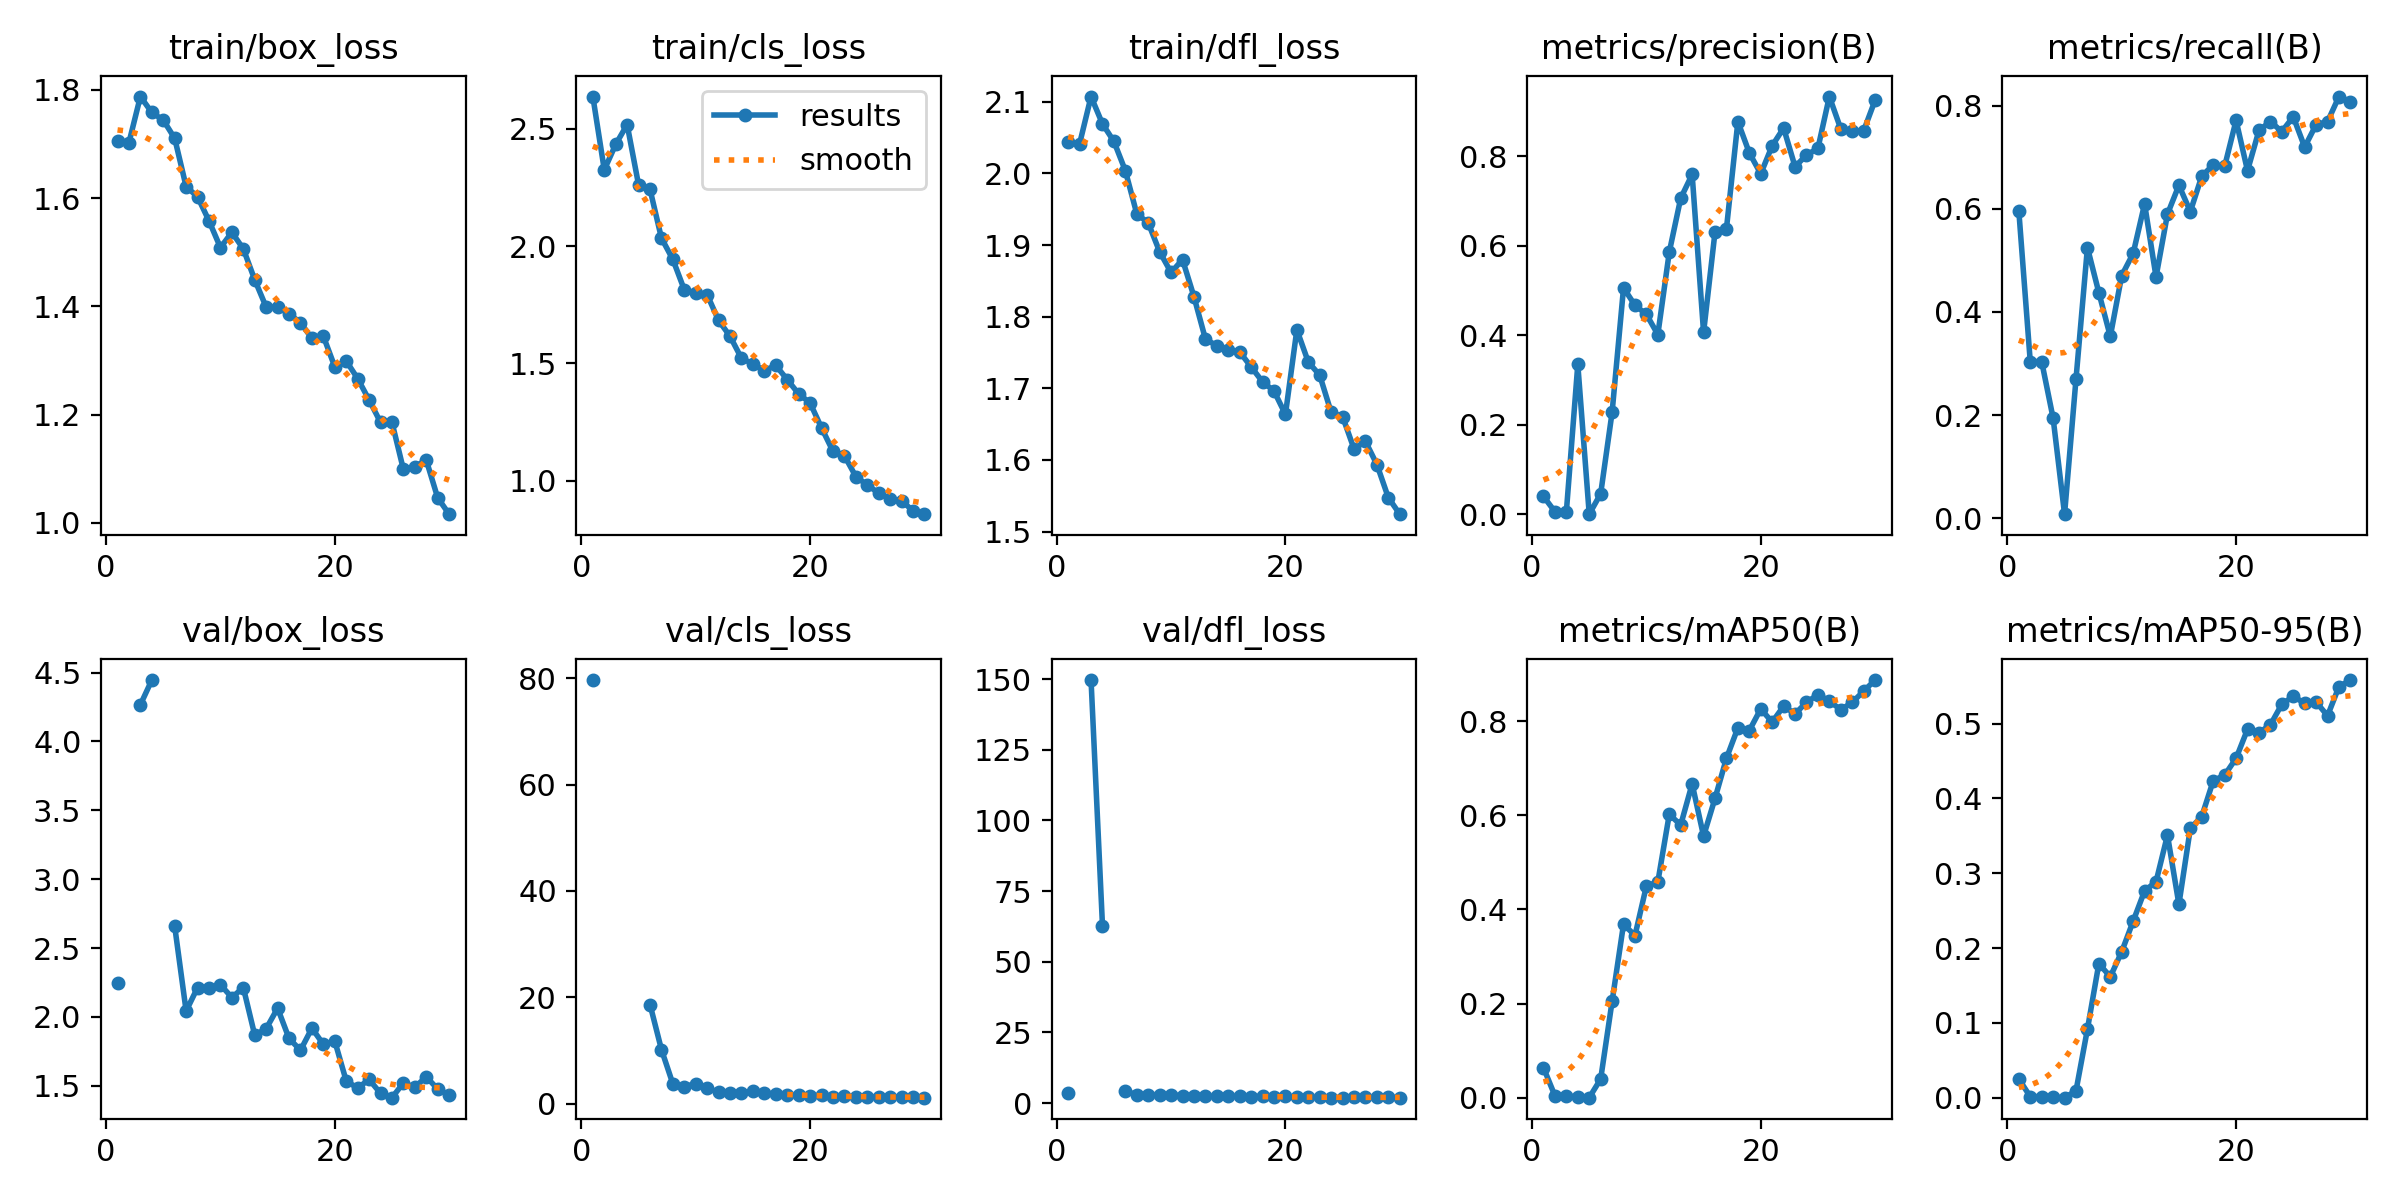

In [ ]:
Image(filename=f'/content/runs/detect/train4/results.png')

In [ ]:
!yolo task=detect mode=val  model=/content/runs/detect/train4/weights/best.pt   data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,126,457 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/treeImage-2/valid/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100% 36/36 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.31s/it]
                   all         36         95      0.925      0.807      0.887      0.558
             Date Palm         18         43      0.962      0.884      0.931      0.562
                  Neem         11         26      0.849      0.923      0.905      0.648
       Royal-Poinciana          9         26      0.965      0.615      0.823      0.463
Speed: 0.2ms preprocess, 68.5ms inference, 0.0ms loss, 25.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict  model=/content/runs/detect/train4/weights/best.pt conf=0.5 source={dataset.location}/test/images

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,126,457 parameters, 0 gradients, 257.4 GFLOPs

image 1/19 /content/treeImage-2/test/images/IMG_2364_jpg.rf.8500699bfe78db9f4b0e4ffb80efa5e0.jpg: 640x640 3 Neems, 96.3ms
image 2/19 /content/treeImage-2/test/images/IMG_2370_jpg.rf.6032181e38769cdc1e9cb75a65bac13e.jpg: 640x640 1 Neem, 59.1ms
image 3/19 /content/treeImage-2/test/images/IMG_2373_jpg.rf.3283f340ee20140ab4daf878dcddccd7.jpg: 640x640 2 Neems, 60.2ms
image 4/19 /content/treeImage-2/test/images/IMG_2375_jpg.rf.79ccc75407702d81199ab6f970b60963.jpg: 640x640 3 Neems, 57.3ms
image 5/19 /content/treeImage-2/test/images/IMG_2381_jpg.rf.8b4c585bef04fd5175c796d3516005e5.jpg: 640x640 3 Neems, 56.8ms
image 6/19 /content/treeImage-2/test/images/Photo-09-06-2024-11-45-28-AM_jpg.rf.db03ead97db5f279b5d810a7c7daf77b.jpg: 640x640 2 Date Palms, 58.8ms
image 7/19 /content/treeImage-2/test/images/Photo-09-06-2024-11-45-50-AM

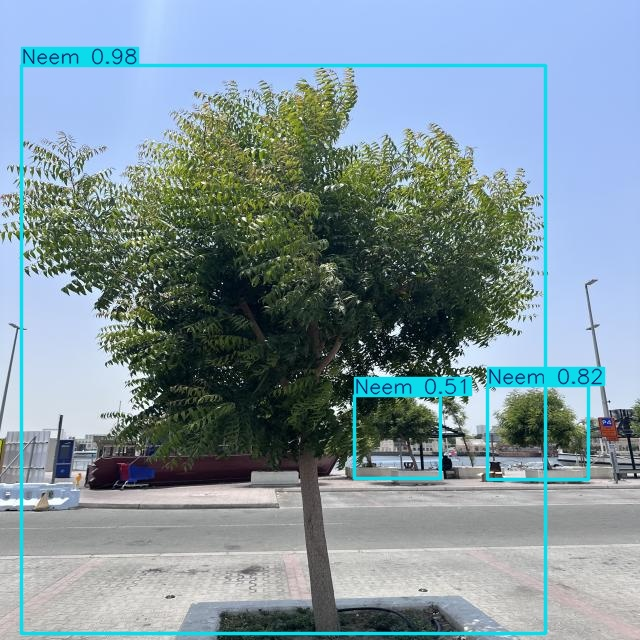

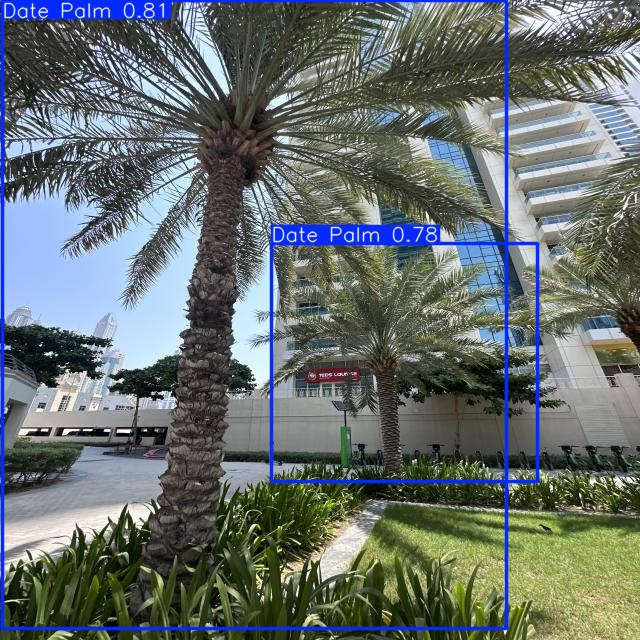

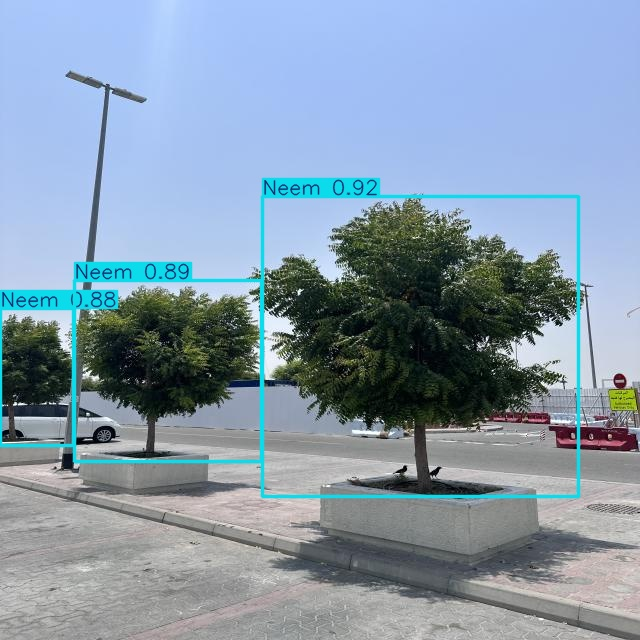

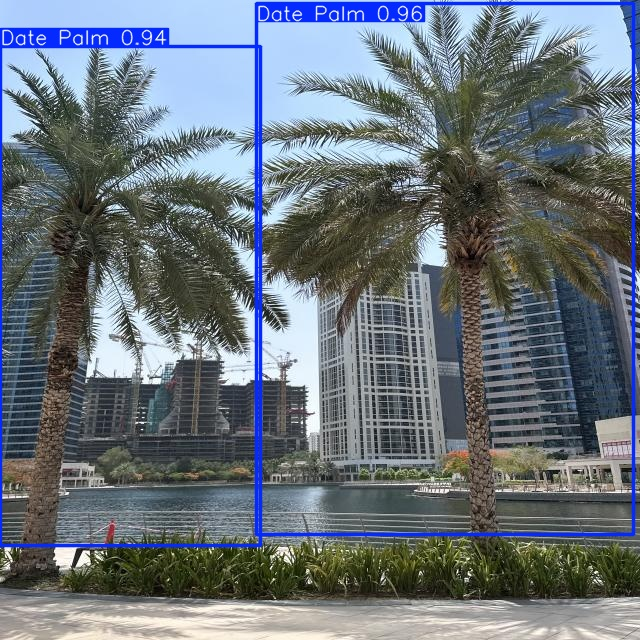

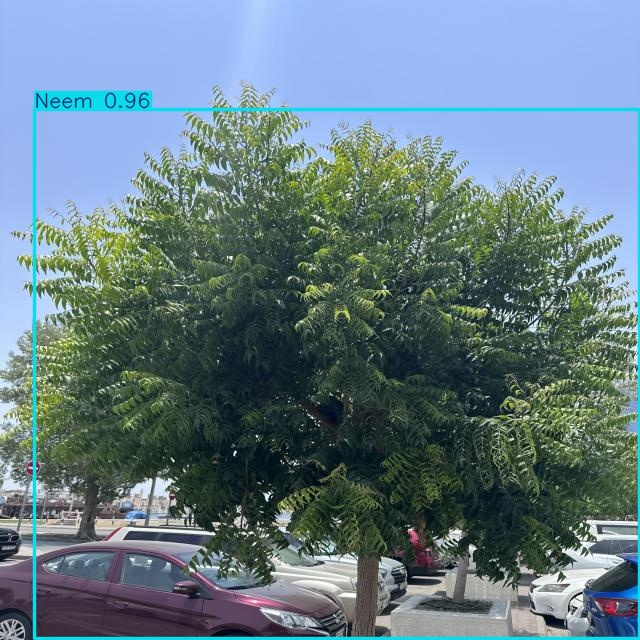

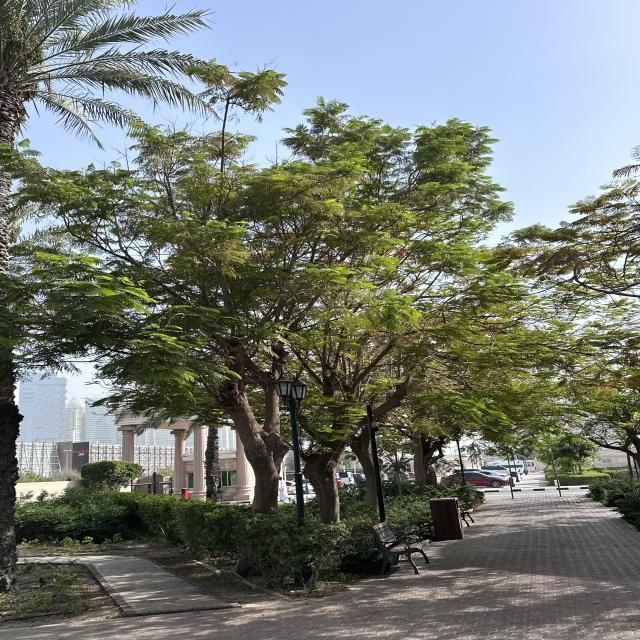

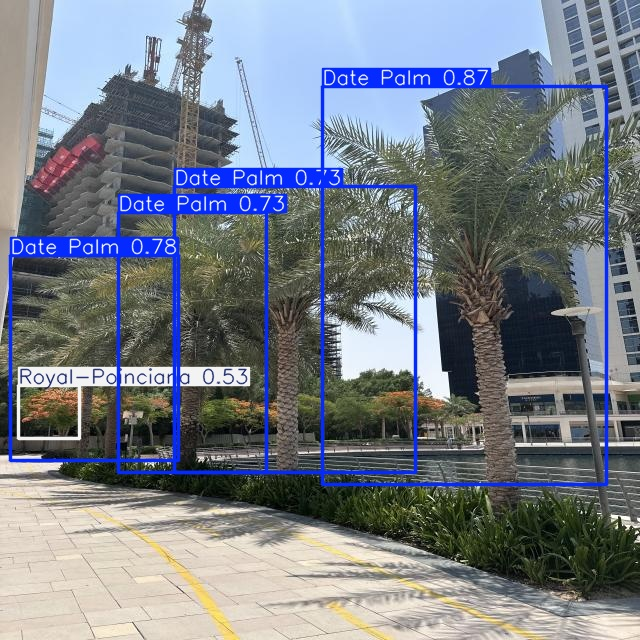

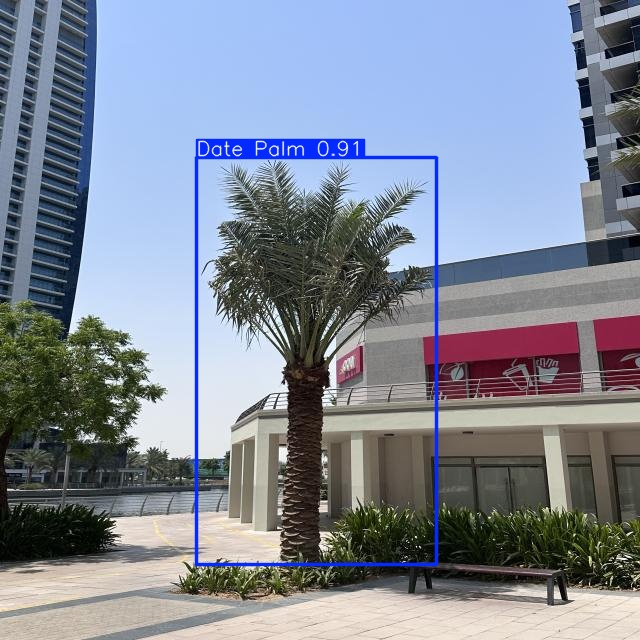

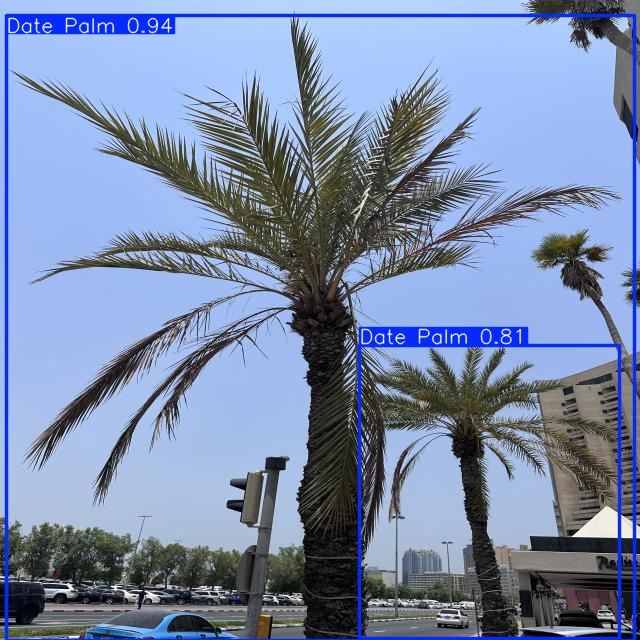

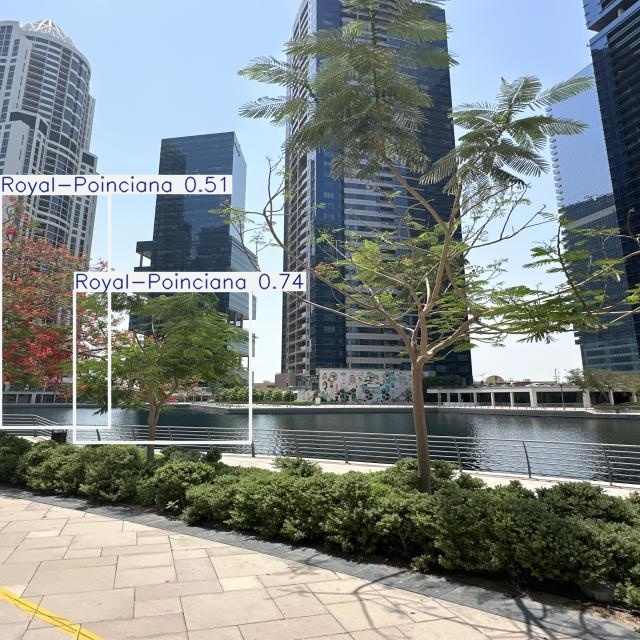

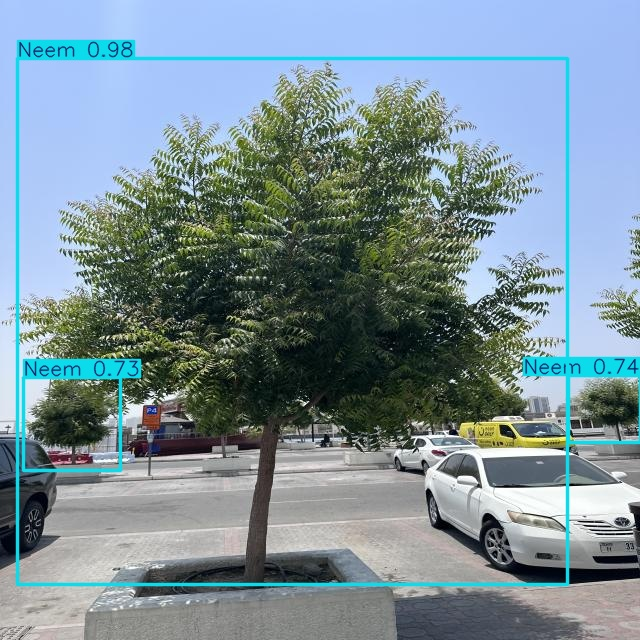

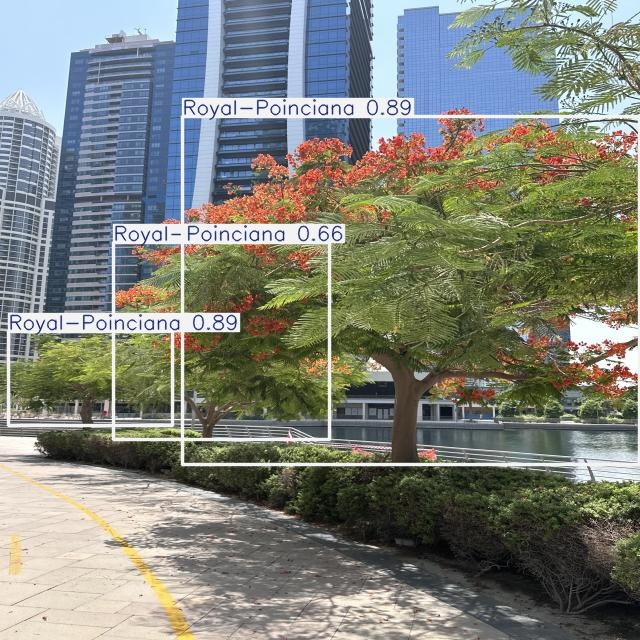

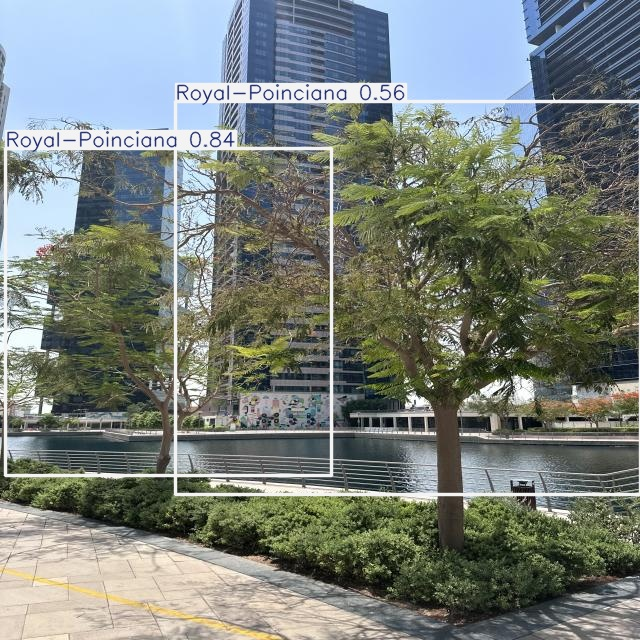

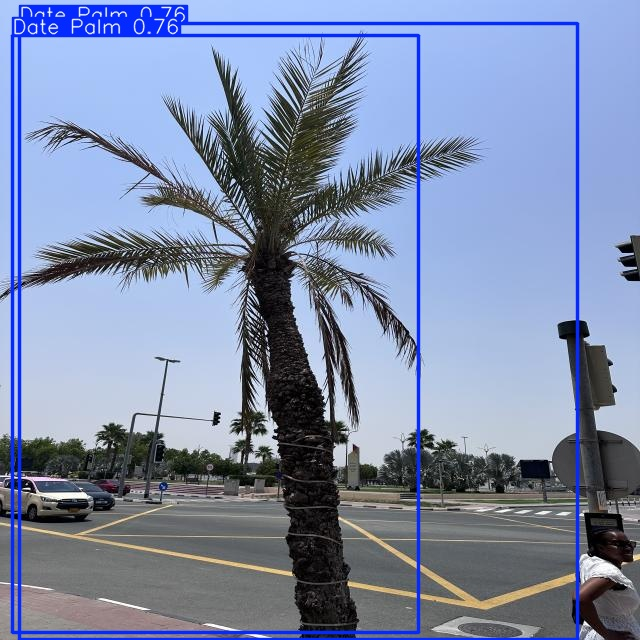

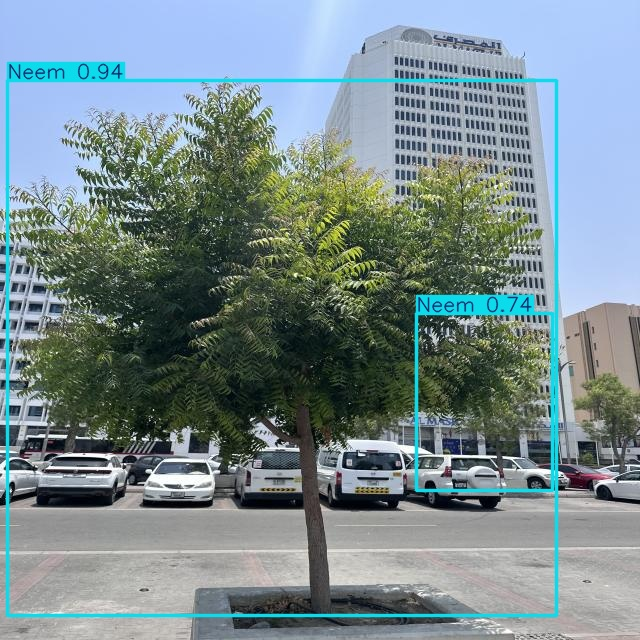

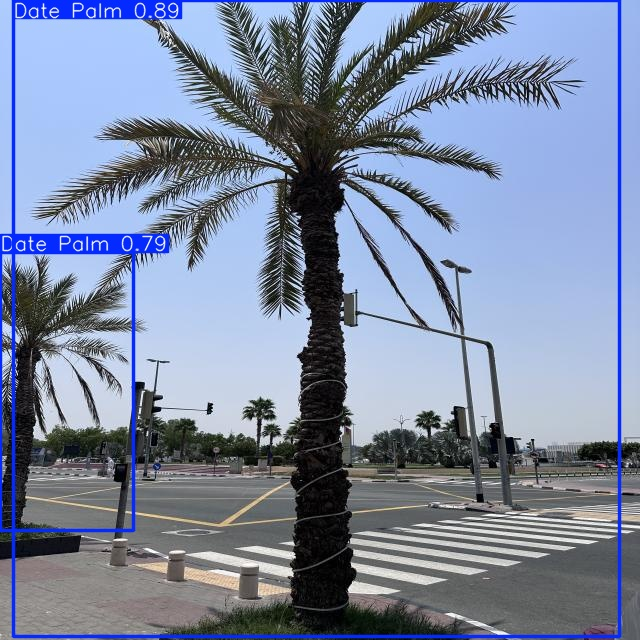

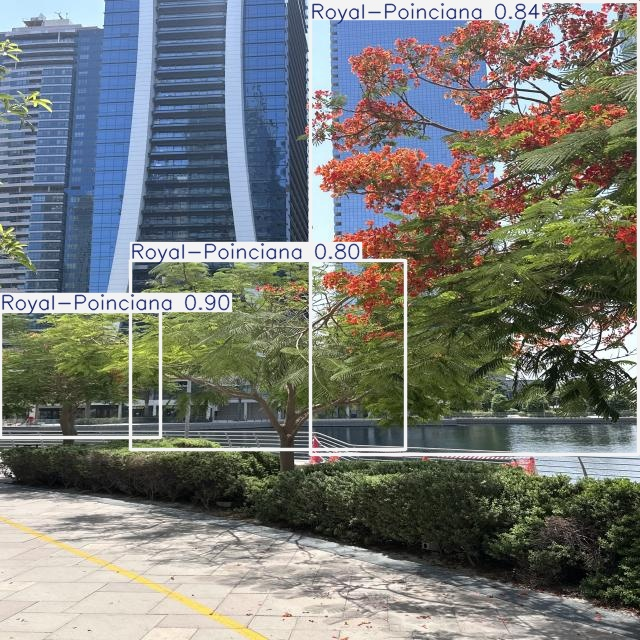

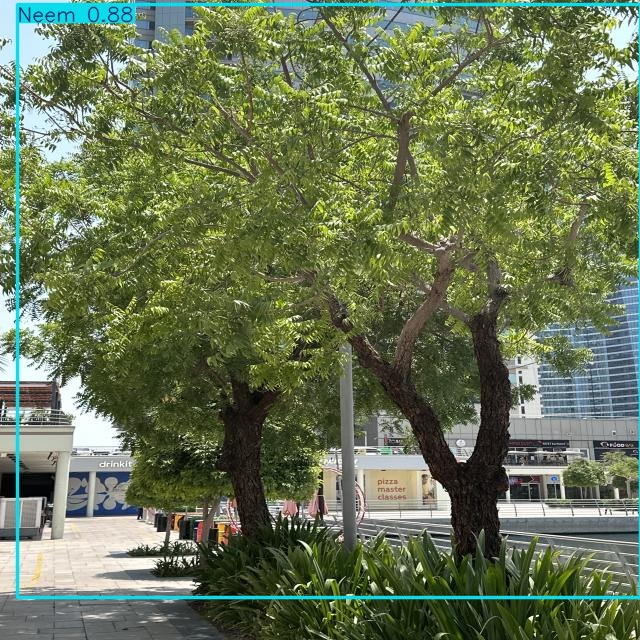

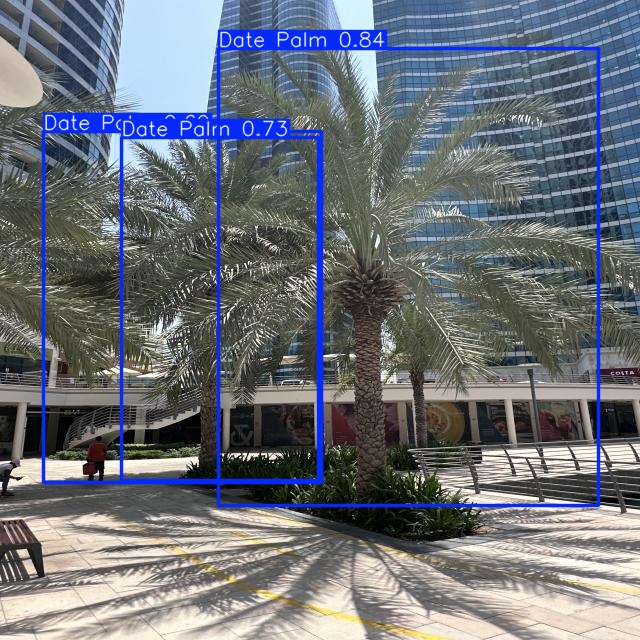

In [ ]:
import glob
from IPython.display import Image,display
for image_path in glob.glob(f"/content/runs/detect/predict/*.jpg"):
    display(Image(filename=image_path, height=600))
    print('\n')

In [ ]:
from google.colab import files
import glob
from IPython.display import Image,display
for image_path in glob.glob(f"/content/treeImage-2/test/images/*.png"):
    files.download(image_path)  # Replace with your actual file path



In [ ]:
files.download('/content/treeImage-2/test/images/IMG_2370_jpg.rf.6032181e38769cdc1e9cb75a65bac13e.jpg')
files.download('/content/treeImage-2/test/images/IMG_2373_jpg.rf.3283f340ee20140ab4daf878dcddccd7.jpg')
files.download('/content/treeImage-2/test/images/IMG_2375_jpg.rf.79ccc75407702d81199ab6f970b60963.jpg')
files.download('/content/treeImage-2/test/images/IMG_2381_jpg.rf.8b4c585bef04fd5175c796d3516005e5.jpg')
files.download('/content/treeImage-2/test/images/Photo-09-06-2024-11-45-28-AM_jpg.rf.db03ead97db5f279b5d810a7c7daf77b.jpg')
files.download('/content/treeImage-2/test/images/Photo-09-06-2024-11-45-50-AM_jpg.rf.228a6703e77b08649e7babc1442f496a.jpg')
files.download('/content/treeImage-2/test/images/Photo-09-06-2024-11-46-08-AM_jpg.rf.4846e90f4e4b5ab5b5f62e98db2b4824.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

from google.colab import files

files.download('/content/runs/detect/train4/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>